<a href="https://colab.research.google.com/github/MLEngDeena/M.Tech-Project/blob/main/Data_Preprocessing_From_RawCSI_to_Final_Data_of_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install hampel
!pip install plotly==5.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 1.1 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
import sys
import pandas as pd
from math import sqrt, atan2
import re
import matplotlib.pyplot as plt
from hampel import hampel
from scipy.signal import butter, sosfilt
import plotly.express as px

import os
from google.colab import files

In [ ]:
d = pd.read_csv("RawData.csv")

col = [i for i in range(64)]
df = pd.DataFrame(columns = col)

amps = []

for i, j in enumerate(d['CSI_DATA']):
    #if (i==0):
        #continue
    
    imaginary = []
    real = []
    amp = []
    row = []
    
    csi_string = re.findall(r"\[(.*)\]", j)[0]
    csi_raw = [int(x) for x in csi_string.split(" ") if x != '']
    
    for k in range(len(csi_raw)):
        if (k%2 == 0):
            imaginary.append(csi_raw[k])
        else:
            real.append(csi_raw[k])
            
    for k in range(int(len(csi_raw) / 2)):
        amp.append(round(sqrt(imaginary[k] ** 2 + real[k] ** 2), 1))
        
    amps.append(amp)
    
for i in amps:
    temp = pd.Series(i, index=df.columns)
    df = df.append(temp, ignore_index=True)

df.to_csv("exp_amps.csv", index=False)
df.head(15)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,133.9,8.0,0.0,0.0,0.0,0.0,24.7,25.5,25.5,26.3,...,16.2,16.2,16.6,16.2,15.7,0.0,0.0,0.0,0.0,0.0
1,164.9,8.0,0.0,0.0,0.0,0.0,28.3,28.2,28.1,28.1,...,18.4,18.4,18.8,17.5,17.5,0.0,0.0,0.0,0.0,0.0
2,23.3,14.0,0.0,0.0,0.0,0.0,26.5,25.5,26.7,25.7,...,17.0,17.0,17.0,17.0,17.0,0.0,0.0,0.0,0.0,0.0
3,88.1,2.0,0.0,0.0,0.0,0.0,25.0,25.0,25.0,25.0,...,17.5,16.8,16.8,16.8,16.2,0.0,0.0,0.0,0.0,0.0
4,126.3,4.0,0.0,0.0,0.0,0.0,18.0,17.8,18.4,17.7,...,12.1,11.7,11.7,11.4,11.4,0.0,0.0,0.0,0.0,0.0
5,88.1,2.0,0.0,0.0,0.0,0.0,21.5,23.3,22.4,23.7,...,15.3,15.3,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0
6,88.1,2.0,0.0,0.0,0.0,0.0,22.5,23.3,23.7,23.7,...,15.6,15.6,16.3,15.6,15.6,0.0,0.0,0.0,0.0,0.0
7,146.0,6.0,0.0,0.0,0.0,0.0,30.0,30.4,29.5,29.5,...,19.1,19.1,19.8,18.4,19.1,0.0,0.0,0.0,0.0,0.0
8,146.0,6.0,0.0,0.0,0.0,0.0,30.0,30.4,29.5,29.5,...,19.1,19.1,19.8,18.4,19.1,0.0,0.0,0.0,0.0,0.0
9,146.0,6.0,0.0,0.0,0.0,0.0,30.0,30.4,29.5,29.5,...,19.1,19.1,19.8,18.4,19.1,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(os.getcwd())
print(os.listdir())

/content
['.config', 'RawData.csv', 'STA1_amps_zeros.csv', 'exp_nozeros.csv', 'exp_amps.csv', 'sample_data']


In [ ]:
df = df.iloc[50: , :]
df = df.iloc[:-50]
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
50,146.0,6.0,0.0,0.0,0.0,0.0,23.6,23.4,24.1,23.3,...,15.7,16.1,15.7,15.7,15.2,0.0,0.0,0.0,0.0,0.0
51,146.0,6.0,0.0,0.0,0.0,0.0,23.6,23.4,24.1,23.3,...,15.7,16.1,15.7,15.7,15.2,0.0,0.0,0.0,0.0,0.0
52,146.0,6.0,0.0,0.0,0.0,0.0,17.2,17.2,17.5,17.5,...,11.4,11.4,10.8,10.8,10.8,0.0,0.0,0.0,0.0,0.0
53,146.0,6.0,0.0,0.0,0.0,0.0,17.2,17.2,17.5,17.5,...,11.4,11.4,10.8,10.8,10.8,0.0,0.0,0.0,0.0,0.0
54,146.0,6.0,0.0,0.0,0.0,0.0,17.2,17.2,17.5,17.5,...,11.4,11.4,10.8,10.8,10.8,0.0,0.0,0.0,0.0,0.0
55,146.0,6.0,0.0,0.0,0.0,0.0,17.2,17.2,17.5,17.5,...,11.4,11.4,10.8,10.8,10.8,0.0,0.0,0.0,0.0,0.0
56,146.0,6.0,0.0,0.0,0.0,0.0,17.2,17.2,17.5,17.5,...,11.4,11.4,10.8,10.8,10.8,0.0,0.0,0.0,0.0,0.0
57,146.0,6.0,0.0,0.0,0.0,0.0,32.6,32.8,32.8,32.2,...,20.8,20.8,20.2,20.2,20.2,0.0,0.0,0.0,0.0,0.0
58,146.0,6.0,0.0,0.0,0.0,0.0,24.3,25.3,25.7,25.7,...,17.0,17.0,17.0,17.0,16.1,0.0,0.0,0.0,0.0,0.0
59,146.0,6.0,0.0,0.0,0.0,0.0,26.6,27.5,26.4,27.3,...,17.7,19.1,18.4,17.7,17.7,0.0,0.0,0.0,0.0,0.0


In [ ]:
# import matplotlib.pyplot as plt

def plot_df(df):
  for index, row in df.head(5).iterrows():
  # print(row)
    plt.plot(row)
    plt.show()

In [ ]:
print(df)
# print((df.iloc[0]))

         0    1    2    3    4    5     6     7     8     9   ...    54    55  \
50    146.0  6.0  0.0  0.0  0.0  0.0  23.6  23.4  24.1  23.3  ...  15.7  16.1   
51    146.0  6.0  0.0  0.0  0.0  0.0  23.6  23.4  24.1  23.3  ...  15.7  16.1   
52    146.0  6.0  0.0  0.0  0.0  0.0  17.2  17.2  17.5  17.5  ...  11.4  11.4   
53    146.0  6.0  0.0  0.0  0.0  0.0  17.2  17.2  17.5  17.5  ...  11.4  11.4   
54    146.0  6.0  0.0  0.0  0.0  0.0  17.2  17.2  17.5  17.5  ...  11.4  11.4   
...     ...  ...  ...  ...  ...  ...   ...   ...   ...   ...  ...   ...   ...   
1663  105.6  4.0  0.0  0.0  0.0  0.0   7.1   7.1   7.1   7.8  ...   2.0   3.2   
1664  105.6  4.0  0.0  0.0  0.0  0.0   7.6   7.3   7.6   8.5  ...   2.8   2.8   
1665  105.6  4.0  0.0  0.0  0.0  0.0   6.1   7.1   8.1   7.1  ...   2.2   2.8   
1666  105.6  4.0  0.0  0.0  0.0  0.0   8.9   8.9   9.4   9.8  ...   8.1   8.0   
1667  105.6  4.0  0.0  0.0  0.0  0.0  25.2  26.1  27.0  27.0  ...  21.1  22.2   

        56    57    58   59

In [ ]:
for i in range(len(df[0])):
  df.iloc[i].at[0] = 0.0
  df.iloc[i].at[1] = 0.0

df.to_csv("STA1_amps_zeros.csv", index=False)
print(df)

       0    1    2    3    4    5     6     7     8     9   ...    54    55  \
50    0.0  0.0  0.0  0.0  0.0  0.0  23.6  23.4  24.1  23.3  ...  15.7  16.1   
51    0.0  0.0  0.0  0.0  0.0  0.0  23.6  23.4  24.1  23.3  ...  15.7  16.1   
52    0.0  0.0  0.0  0.0  0.0  0.0  17.2  17.2  17.5  17.5  ...  11.4  11.4   
53    0.0  0.0  0.0  0.0  0.0  0.0  17.2  17.2  17.5  17.5  ...  11.4  11.4   
54    0.0  0.0  0.0  0.0  0.0  0.0  17.2  17.2  17.5  17.5  ...  11.4  11.4   
...   ...  ...  ...  ...  ...  ...   ...   ...   ...   ...  ...   ...   ...   
1663  0.0  0.0  0.0  0.0  0.0  0.0   7.1   7.1   7.1   7.8  ...   2.0   3.2   
1664  0.0  0.0  0.0  0.0  0.0  0.0   7.6   7.3   7.6   8.5  ...   2.8   2.8   
1665  0.0  0.0  0.0  0.0  0.0  0.0   6.1   7.1   8.1   7.1  ...   2.2   2.8   
1666  0.0  0.0  0.0  0.0  0.0  0.0   8.9   8.9   9.4   9.8  ...   8.1   8.0   
1667  0.0  0.0  0.0  0.0  0.0  0.0  25.2  26.1  27.0  27.0  ...  21.1  22.2   

        56    57    58   59   60   61   62   63  
5

In [ ]:
temp = []

for i in range(64):
  if (df.iloc[0].at[i] == 0):
    temp.append(i)

# print(temp, len(temp))
df = df.drop(temp, axis=1)

df.to_csv("exp_nozeros.csv", index=False)
print(df)

        6     7     8     9     10    11    12    13    14    15  ...    49  \
50    23.6  23.4  24.1  23.3  24.0  24.1  24.1  23.4  23.4  23.6  ...  15.8   
51    23.6  23.4  24.1  23.3  24.0  24.1  24.1  23.4  23.4  23.6  ...  15.8   
52    17.2  17.2  17.5  17.5  17.5  17.0  17.0  17.0  16.6  16.6  ...  11.3   
53    17.2  17.2  17.5  17.5  17.5  17.0  17.0  17.0  16.6  16.6  ...  11.3   
54    17.2  17.2  17.5  17.5  17.5  17.0  17.0  17.0  16.6  16.6  ...  11.3   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1663   7.1   7.1   7.1   7.8   7.1   9.2   8.6   7.8   8.6   8.1  ...   1.4   
1664   7.6   7.3   7.6   8.5   8.5   8.2   8.2   8.2   9.1   8.1  ...   2.0   
1665   6.1   7.1   8.1   7.1   7.1   6.3   7.6   6.7   7.3   6.7  ...   1.0   
1666   8.9   8.9   9.4   9.8   9.2   9.2   9.9   9.2   8.6   7.8  ...   7.1   
1667  25.2  26.1  27.0  27.0  27.1  26.3  26.7  26.2  26.2  25.3  ...  19.2   

        50    51    52    53    54    55    56    5

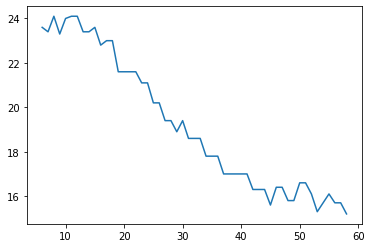

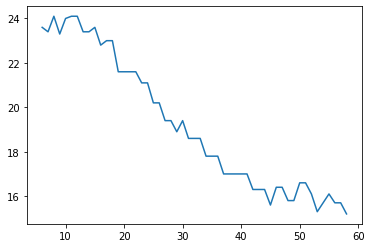

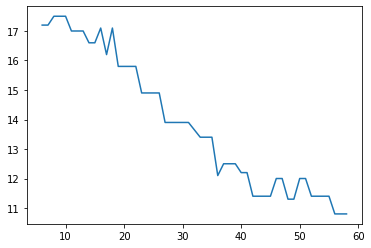

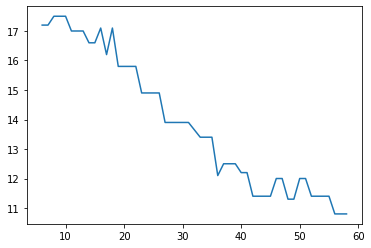

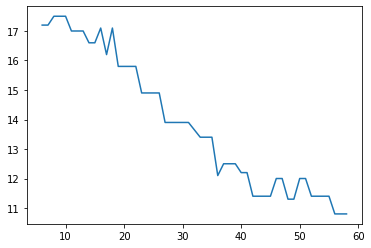

In [ ]:
plot_df(df)

        0     1     2     3     4     5     6     7     8     9   ...    42  \
50    23.6  23.4  24.1  23.3  24.0  24.1  24.1  23.4  23.4  23.6  ...  15.8   
51    23.6  23.4  24.1  23.3  24.0  24.1  24.1  23.4  23.4  23.6  ...  15.8   
52    17.2  17.2  17.5  17.5  17.5  17.0  17.0  17.0  16.6  16.6  ...  11.3   
53    17.2  17.2  17.5  17.5  17.5  17.0  17.0  17.0  16.6  16.6  ...  11.3   
54    17.2  17.2  17.5  17.5  17.5  17.0  17.0  17.0  16.6  16.6  ...  11.3   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1663   7.1   7.1   7.1   7.8   7.1   9.2   8.6   7.8   8.6   8.1  ...   1.4   
1664   7.6   7.3   7.6   8.5   8.5   8.2   8.2   8.2   9.1   8.1  ...   2.0   
1665   6.1   7.1   8.1   7.1   7.1   6.3   7.6   6.7   7.3   6.7  ...   1.0   
1666   8.9   8.9   9.4   9.8   9.2   9.2   9.9   9.2   8.6   7.8  ...   7.1   
1667  25.2  26.1  27.0  27.0  27.1  26.3  26.7  26.2  26.2  25.3  ...  19.2   

        43    44    45    46    47    48    49    5

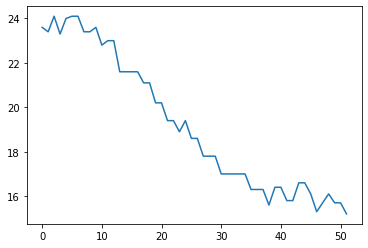

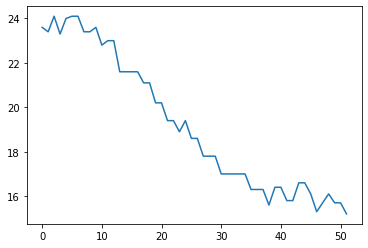

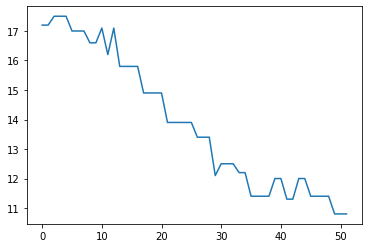

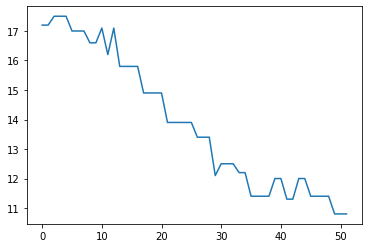

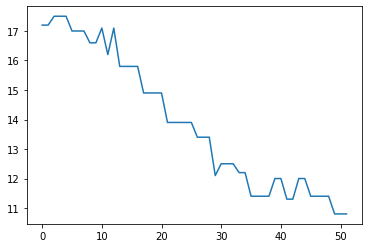

----------------


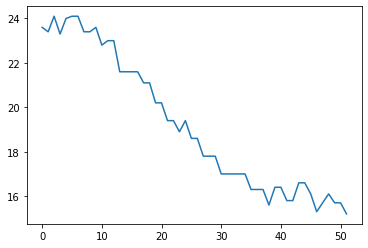

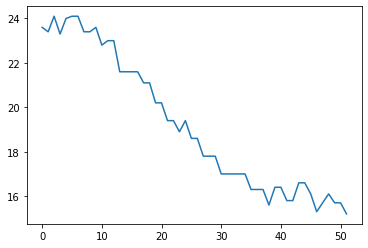

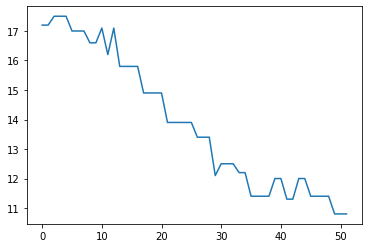

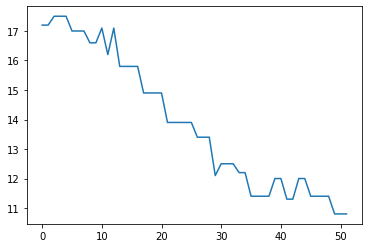

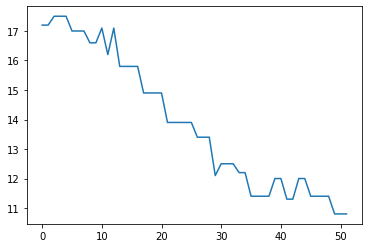

In [ ]:
def hampel_filter(series, window_size, n):
  out = hampel(series, window_size, n, imputation=True)
  # print(out)
  return out

hdf = pd.DataFrame()

# print(df)
df_reindexed = df.set_axis([i for i in range(52)], axis=1, inplace=False)
print(df_reindexed)

for i in range(len(df_reindexed)):
  series = df_reindexed.iloc[i]
  # print(type(series))
  out = hampel_filter(series, 10, 2)
  # print(out)
  hdf = hdf.append(out, ignore_index=True)

print(hdf)

hdf_cols = []
for c in hdf.columns:
  hdf_cols.append(c)

plot_df(df_reindexed)
print("----------------")
plot_df(hdf)

In [ ]:
InputforPCA = pd.read_csv("/content/exp_nozeros.csv")
InputforPCA.head(5)

,6,7,8,9,10,11,12,13,14,15,...,49,50,51,52,53,54,55,56,57,58
0,23.6,23.4,24.1,23.3,24.0,24.1,24.1,23.4,23.4,23.6,...,15.8,16.6,16.6,16.1,15.3,15.7,16.1,15.7,15.7,15.2
1,23.6,23.4,24.1,23.3,24.0,24.1,24.1,23.4,23.4,23.6,...,15.8,16.6,16.6,16.1,15.3,15.7,16.1,15.7,15.7,15.2
2,17.2,17.2,17.5,17.5,17.5,17.0,17.0,17.0,16.6,16.6,...,11.3,12.0,12.0,11.4,11.4,11.4,11.4,10.8,10.8,10.8
3,17.2,17.2,17.5,17.5,17.5,17.0,17.0,17.0,16.6,16.6,...,11.3,12.0,12.0,11.4,11.4,11.4,11.4,10.8,10.8,10.8
4,17.2,17.2,17.5,17.5,17.5,17.0,17.0,17.0,16.6,16.6,...,11.3,12.0,12.0,11.4,11.4,11.4,11.4,10.8,10.8,10.8


In [ ]:
timestamp = d['local_timestamp']
timestamp = timestamp.iloc[50:]
timestamp = timestamp.iloc[:-50]
timestamp.to_csv("timestamp.csv", index=False)
timestamp


50       9233072
51       9233072
52       9234605
53       9234605
54       9234605
          ...   
1663    56449846
1664    56455005
1665    56460356
1666    64607371
1667    64616209
Name: local_timestamp, Length: 1618, dtype: int64

In [ ]:
timestamp = pd.read_csv("/content/exp_nozeros.csv")
timestamp.head(5)

,6,7,8,9,10,11,12,13,14,15,...,49,50,51,52,53,54,55,56,57,58
0,23.6,23.4,24.1,23.3,24.0,24.1,24.1,23.4,23.4,23.6,...,15.8,16.6,16.6,16.1,15.3,15.7,16.1,15.7,15.7,15.2
1,23.6,23.4,24.1,23.3,24.0,24.1,24.1,23.4,23.4,23.6,...,15.8,16.6,16.6,16.1,15.3,15.7,16.1,15.7,15.7,15.2
2,17.2,17.2,17.5,17.5,17.5,17.0,17.0,17.0,16.6,16.6,...,11.3,12.0,12.0,11.4,11.4,11.4,11.4,10.8,10.8,10.8
3,17.2,17.2,17.5,17.5,17.5,17.0,17.0,17.0,16.6,16.6,...,11.3,12.0,12.0,11.4,11.4,11.4,11.4,10.8,10.8,10.8
4,17.2,17.2,17.5,17.5,17.5,17.0,17.0,17.0,16.6,16.6,...,11.3,12.0,12.0,11.4,11.4,11.4,11.4,10.8,10.8,10.8


In [ ]:
print(timestamp.size)
print(InputforPCA.size)

84136
84136


In [ ]:
InputforPCA

,6,7,8,9,10,11,12,13,14,15,...,49,50,51,52,53,54,55,56,57,58
0,23.6,23.4,24.1,23.3,24.0,24.1,24.1,23.4,23.4,23.6,...,15.8,16.6,16.6,16.1,15.3,15.7,16.1,15.7,15.7,15.2
1,23.6,23.4,24.1,23.3,24.0,24.1,24.1,23.4,23.4,23.6,...,15.8,16.6,16.6,16.1,15.3,15.7,16.1,15.7,15.7,15.2
2,17.2,17.2,17.5,17.5,17.5,17.0,17.0,17.0,16.6,16.6,...,11.3,12.0,12.0,11.4,11.4,11.4,11.4,10.8,10.8,10.8
3,17.2,17.2,17.5,17.5,17.5,17.0,17.0,17.0,16.6,16.6,...,11.3,12.0,12.0,11.4,11.4,11.4,11.4,10.8,10.8,10.8
4,17.2,17.2,17.5,17.5,17.5,17.0,17.0,17.0,16.6,16.6,...,11.3,12.0,12.0,11.4,11.4,11.4,11.4,10.8,10.8,10.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,7.1,7.1,7.1,7.8,7.1,9.2,8.6,7.8,8.6,8.1,...,1.4,1.4,1.0,2.0,2.0,2.0,3.2,3.2,4.1,4.1
1614,7.6,7.3,7.6,8.5,8.5,8.2,8.2,8.2,9.1,8.1,...,2.0,2.2,2.0,2.2,2.2,2.8,2.8,3.2,3.6,4.5
1615,6.1,7.1,8.1,7.1,7.1,6.3,7.6,6.7,7.3,6.7,...,1.0,1.0,1.4,1.4,2.2,2.2,2.8,2.8,2.8,3.6
1616,8.9,8.9,9.4,9.8,9.2,9.2,9.9,9.2,8.6,7.8,...,7.1,7.1,8.1,7.1,8.1,8.1,8.0,8.0,8.0,8.0


In [ ]:
InputforPCA["Activity"] = "Gesture_Name"

In [ ]:
InputforPCA

,6,7,8,9,10,11,12,13,14,15,...,50,51,52,53,54,55,56,57,58,Activity
0,23.6,23.4,24.1,23.3,24.0,24.1,24.1,23.4,23.4,23.6,...,16.6,16.6,16.1,15.3,15.7,16.1,15.7,15.7,15.2,Gesture_Name
1,23.6,23.4,24.1,23.3,24.0,24.1,24.1,23.4,23.4,23.6,...,16.6,16.6,16.1,15.3,15.7,16.1,15.7,15.7,15.2,Gesture_Name
2,17.2,17.2,17.5,17.5,17.5,17.0,17.0,17.0,16.6,16.6,...,12.0,12.0,11.4,11.4,11.4,11.4,10.8,10.8,10.8,Gesture_Name
3,17.2,17.2,17.5,17.5,17.5,17.0,17.0,17.0,16.6,16.6,...,12.0,12.0,11.4,11.4,11.4,11.4,10.8,10.8,10.8,Gesture_Name
4,17.2,17.2,17.5,17.5,17.5,17.0,17.0,17.0,16.6,16.6,...,12.0,12.0,11.4,11.4,11.4,11.4,10.8,10.8,10.8,Gesture_Name
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,7.1,7.1,7.1,7.8,7.1,9.2,8.6,7.8,8.6,8.1,...,1.4,1.0,2.0,2.0,2.0,3.2,3.2,4.1,4.1,Gesture_Name
1614,7.6,7.3,7.6,8.5,8.5,8.2,8.2,8.2,9.1,8.1,...,2.2,2.0,2.2,2.2,2.8,2.8,3.2,3.6,4.5,Gesture_Name
1615,6.1,7.1,8.1,7.1,7.1,6.3,7.6,6.7,7.3,6.7,...,1.0,1.4,1.4,2.2,2.2,2.8,2.8,2.8,3.6,Gesture_Name
1616,8.9,8.9,9.4,9.8,9.2,9.2,9.9,9.2,8.6,7.8,...,7.1,8.1,7.1,8.1,8.1,8.0,8.0,8.0,8.0,Gesture_Name


In [ ]:
X = InputforPCA.iloc[:, :-1].values
y = InputforPCA.iloc[:, -1].values

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X = pca.fit_transform(X)
type(X)

numpy.ndarray

In [ ]:
print(X)

[[ 3.79499029e+01 -4.99408167e+00  1.78221866e-02]
 [ 3.79499029e+01 -4.99408167e+00  1.78221866e-02]
 [-5.35304961e-01 -7.51814906e-02  1.48444146e+00]
 ...
 [-6.82890749e+01 -7.85555358e-01  3.65473347e+00]
 [-4.69244225e+01  9.91218863e+00 -3.47705697e+00]
 [ 4.66720583e+01 -1.16353633e+00 -2.09355035e+01]]


In [ ]:
pd.DataFrame(X).to_csv('PCAData.csv')

In [ ]:
timestamp = pd.read_csv('timestamp.csv')
PCAData = pd.read_csv('PCAData.csv')

In [ ]:
PCAData["Time"] = timestamp['local_timestamp']
PCAData["Activity"] = "Gesture_Name"

In [ ]:
PCAData

,Unnamed: 0,0,1,2,Time,Activity
0,0,37.949903,-4.994082,0.017822,9233072,Gesture_Name
1,1,37.949903,-4.994082,0.017822,9233072,Gesture_Name
2,2,-0.535305,-0.075181,1.484441,9234605,Gesture_Name
3,3,-0.535305,-0.075181,1.484441,9234605,Gesture_Name
4,4,-0.535305,-0.075181,1.484441,9234605,Gesture_Name
...,...,...,...,...,...,...
1613,1613,-64.395051,-2.884784,3.283969,56449846,Gesture_Name
1614,1614,-60.851492,-1.806743,4.591948,56455005,Gesture_Name
1615,1615,-68.289075,-0.785555,3.654733,56460356,Gesture_Name
1616,1616,-46.924422,9.912189,-3.477057,64607371,Gesture_Name


In [ ]:
# altering the DataFrame
#del PCAData['Unnamed: 0']
PCAData = PCAData[['Activity', 'Time', '0', '1', '2']]
PCAData

,Activity,Time,0,1,2
0,Gesture_Name,9233072,37.949903,-4.994082,0.017822
1,Gesture_Name,9233072,37.949903,-4.994082,0.017822
2,Gesture_Name,9234605,-0.535305,-0.075181,1.484441
3,Gesture_Name,9234605,-0.535305,-0.075181,1.484441
4,Gesture_Name,9234605,-0.535305,-0.075181,1.484441
...,...,...,...,...,...
1613,Gesture_Name,56449846,-64.395051,-2.884784,3.283969
1614,Gesture_Name,56455005,-60.851492,-1.806743,4.591948
1615,Gesture_Name,56460356,-68.289075,-0.785555,3.654733
1616,Gesture_Name,64607371,-46.924422,9.912189,-3.477057


In [ ]:
PCAData = PCAData.rename(columns={'Activity': 'activity', 'Time': 'time', '0': 'pca1', '1': 'pca2', '2': 'pca3'})
PCAData

,activity,time,pca1,pca2,pca3
0,Gesture_Name,9233072,37.949903,-4.994082,0.017822
1,Gesture_Name,9233072,37.949903,-4.994082,0.017822
2,Gesture_Name,9234605,-0.535305,-0.075181,1.484441
3,Gesture_Name,9234605,-0.535305,-0.075181,1.484441
4,Gesture_Name,9234605,-0.535305,-0.075181,1.484441
...,...,...,...,...,...
1613,Gesture_Name,56449846,-64.395051,-2.884784,3.283969
1614,Gesture_Name,56455005,-60.851492,-1.806743,4.591948
1615,Gesture_Name,56460356,-68.289075,-0.785555,3.654733
1616,Gesture_Name,64607371,-46.924422,9.912189,-3.477057


In [ ]:
pd.DataFrame(PCAData).to_csv('FinalData.csv')